In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import glob

In [3]:
#indentificando arquivo automático com glob
mpl.style.use("dark_background")
csv = glob.glob("BD//*csv*")
caminho = csv[0]
print(caminho)

BD\HRDataset_v14.csv


In [4]:
#lendo arquivo e tratando colunas
df = pd.read_csv(caminho)
df['GenderID'] = df['GenderID'].replace(1,'Masculino')
df['GenderID'] = df['GenderID'].replace(0,'Feminino')
df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,Masculino,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,Masculino,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,Feminino,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,Feminino,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,Feminino,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,Masculino,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,Feminino,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,Feminino,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,Feminino,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


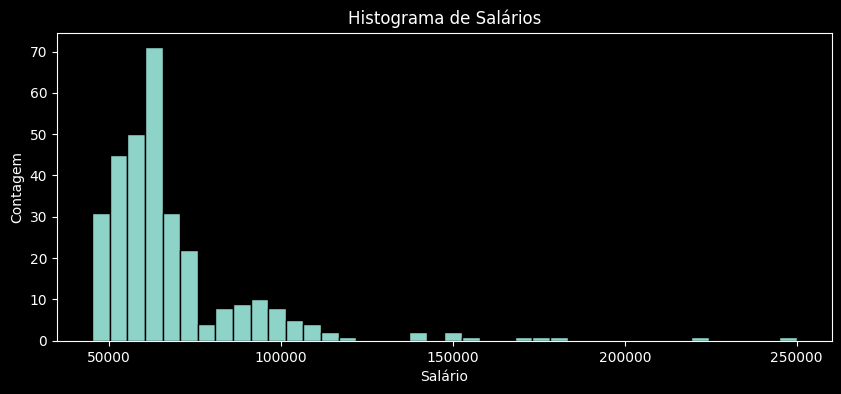

In [5]:
#Histograma salários no matplot
fig, ax = plt.subplots(figsize=(10,4))
ax.set_xlabel('Salário')
ax.set_ylabel('Contagem')
ax.set_title('Histograma de Salários')
ax.hist(df['Salary'], bins=40, edgecolor='k')
plt.show()

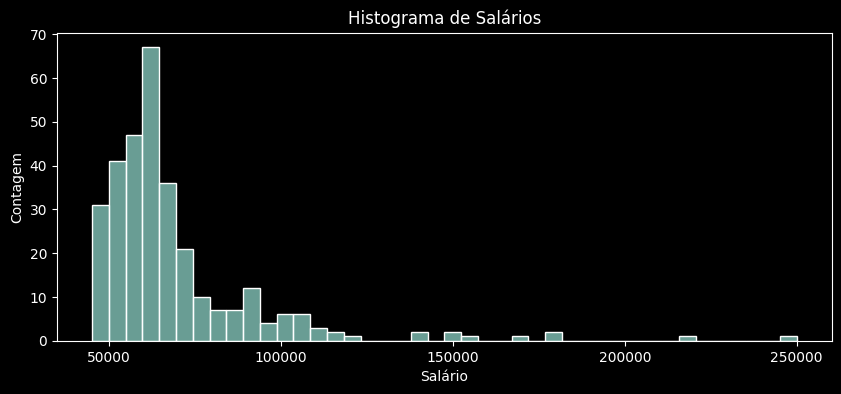

In [6]:
#Histograma salários no seaborn
plt.figure(figsize=(10, 4))
sns.histplot(df, x='Salary')
plt.xlabel('Salário')
plt.ylabel('Contagem')
plt.title('Histograma de Salários')
plt.show()

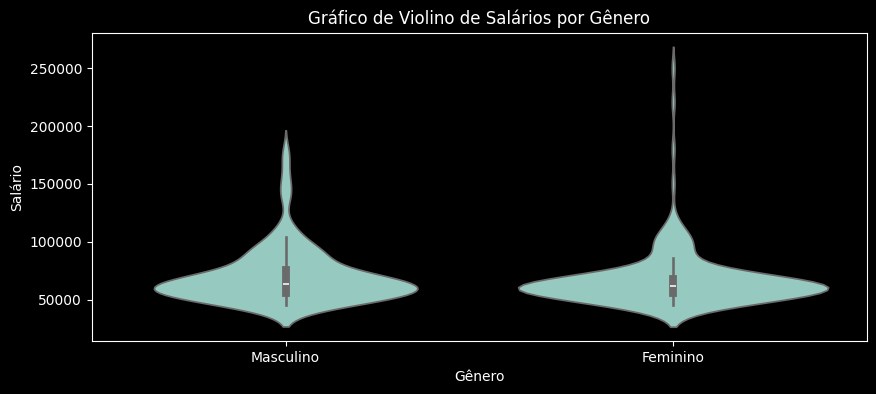

In [7]:
#Violino de salários por genero no seaborn
plt.figure(figsize=(10, 4))
sns.violinplot(data = df, x='GenderID', y='Salary')
plt.xlabel('Gênero')
plt.ylabel('Salário')
plt.title('Gráfico de Violino de Salários por Gênero')
plt.show()

In [17]:
#Tratativa das colunas da série temporal
df['Ano'] = df['DateofHire'].dt.year
df['Ano'] = df['Ano'].astype(str)
df['Mês'] = df['DateofHire'].dt.month

def ajustar_formato(valor):
    if valor < 10:
        return '0'+str(valor)
    else:
        return str(valor)

df['Mês'] = df['Mês'].apply(lambda x: ajustar_formato(x))
df['DataContratação'] = df['Ano'] + '-' + df['Mês']
contagem_anos = df['DataContratação'].value_counts().reset_index().sort_values(by='DataContratação')
ano = contagem_anos['DataContratação']
contagem = contagem_anos['count']
print(contagem_anos)
eixo_x = ano[::4]

   DataContratação  count
51         2006-01      1
53         2007-06      1
49         2007-11      1
52         2008-01      1
69         2008-09      1
..             ...    ...
42         2016-10      2
58         2017-01      1
36         2017-02      3
40         2017-04      2
48         2018-07      1

[70 rows x 2 columns]


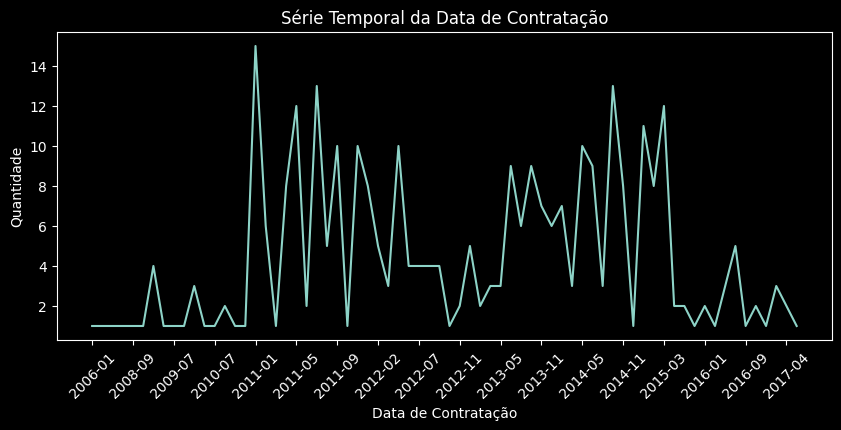

In [18]:
#Gráfico de série temporal para data de contratação
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(ano,contagem)
ax.set_xlabel('Data de Contratação')
ax.set_ylabel('Quantidade')
ax.set_title('Série Temporal da Data de Contratação')
ax.set_xticks(eixo_x)
plt.xticks(rotation=45)
plt.show()